### Preprocessing

 - missingno : 결측데이터 검색
 - sklearn.impute : 결측 데이터 대체
 - patsy : 데이터 선택, 변환, 추가, 스케일링
 - sklearn.preprocessing : 스케일링 변환
 
--- 

#### missingno package

 - NaN 데이터를 찾는 기능 
 - NaN 값은 부동소수점 실수 자료셩에만 있는 값. 
 
    - 정수자료 : Int64Dtype
    - 시간 자료형 : parse_date $\rightarrow$ datetime64[ns]
     

In [84]:
pd.set_option('display.float_format', '{:.2f}'.format)
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = (12, 6)

In [11]:
from io import StringIO

csv_data = StringIO("""
x1,x2,x3,x4,x5
1,0.1,"1",2019-01-01,A
2,,,2019-01-02,B
3,,"3",2019-01-03,C
,0.4,"4",2019-01-04,A
5,0.5,"5",2019-01-05,B
,,,2019-01-06,C
7,0.7,"7",,A
8,0.8,"8",2019-01-08,B
9,0.9,,2019-01-09,C
""")

df = pd.read_csv(csv_data,dtype = {'x1' : pd.Int64Dtype()}, parse_dates = [3])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
x1    7 non-null Int64
x2    6 non-null float64
x3    6 non-null float64
x4    8 non-null datetime64[ns]
x5    9 non-null object
dtypes: Int64(1), datetime64[ns](1), float64(2), object(1)
memory usage: 497.0+ bytes


In [15]:
df

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
1,2,NaN,NaN,2019-01-02,B
2,3,NaN,3.0,2019-01-03,C
3,NaN,0.4,4.0,2019-01-04,A
4,5,0.5,5.0,2019-01-05,B
5,NaN,NaN,NaN,2019-01-06,C
6,7,0.7,7.0,NaT,A
7,8,0.8,8.0,2019-01-08,B
8,9,0.9,NaN,2019-01-09,C


In [16]:
df.isnull().sum()

x1    2
x2    3
x3    3
x4    1
x5    0
dtype: int64

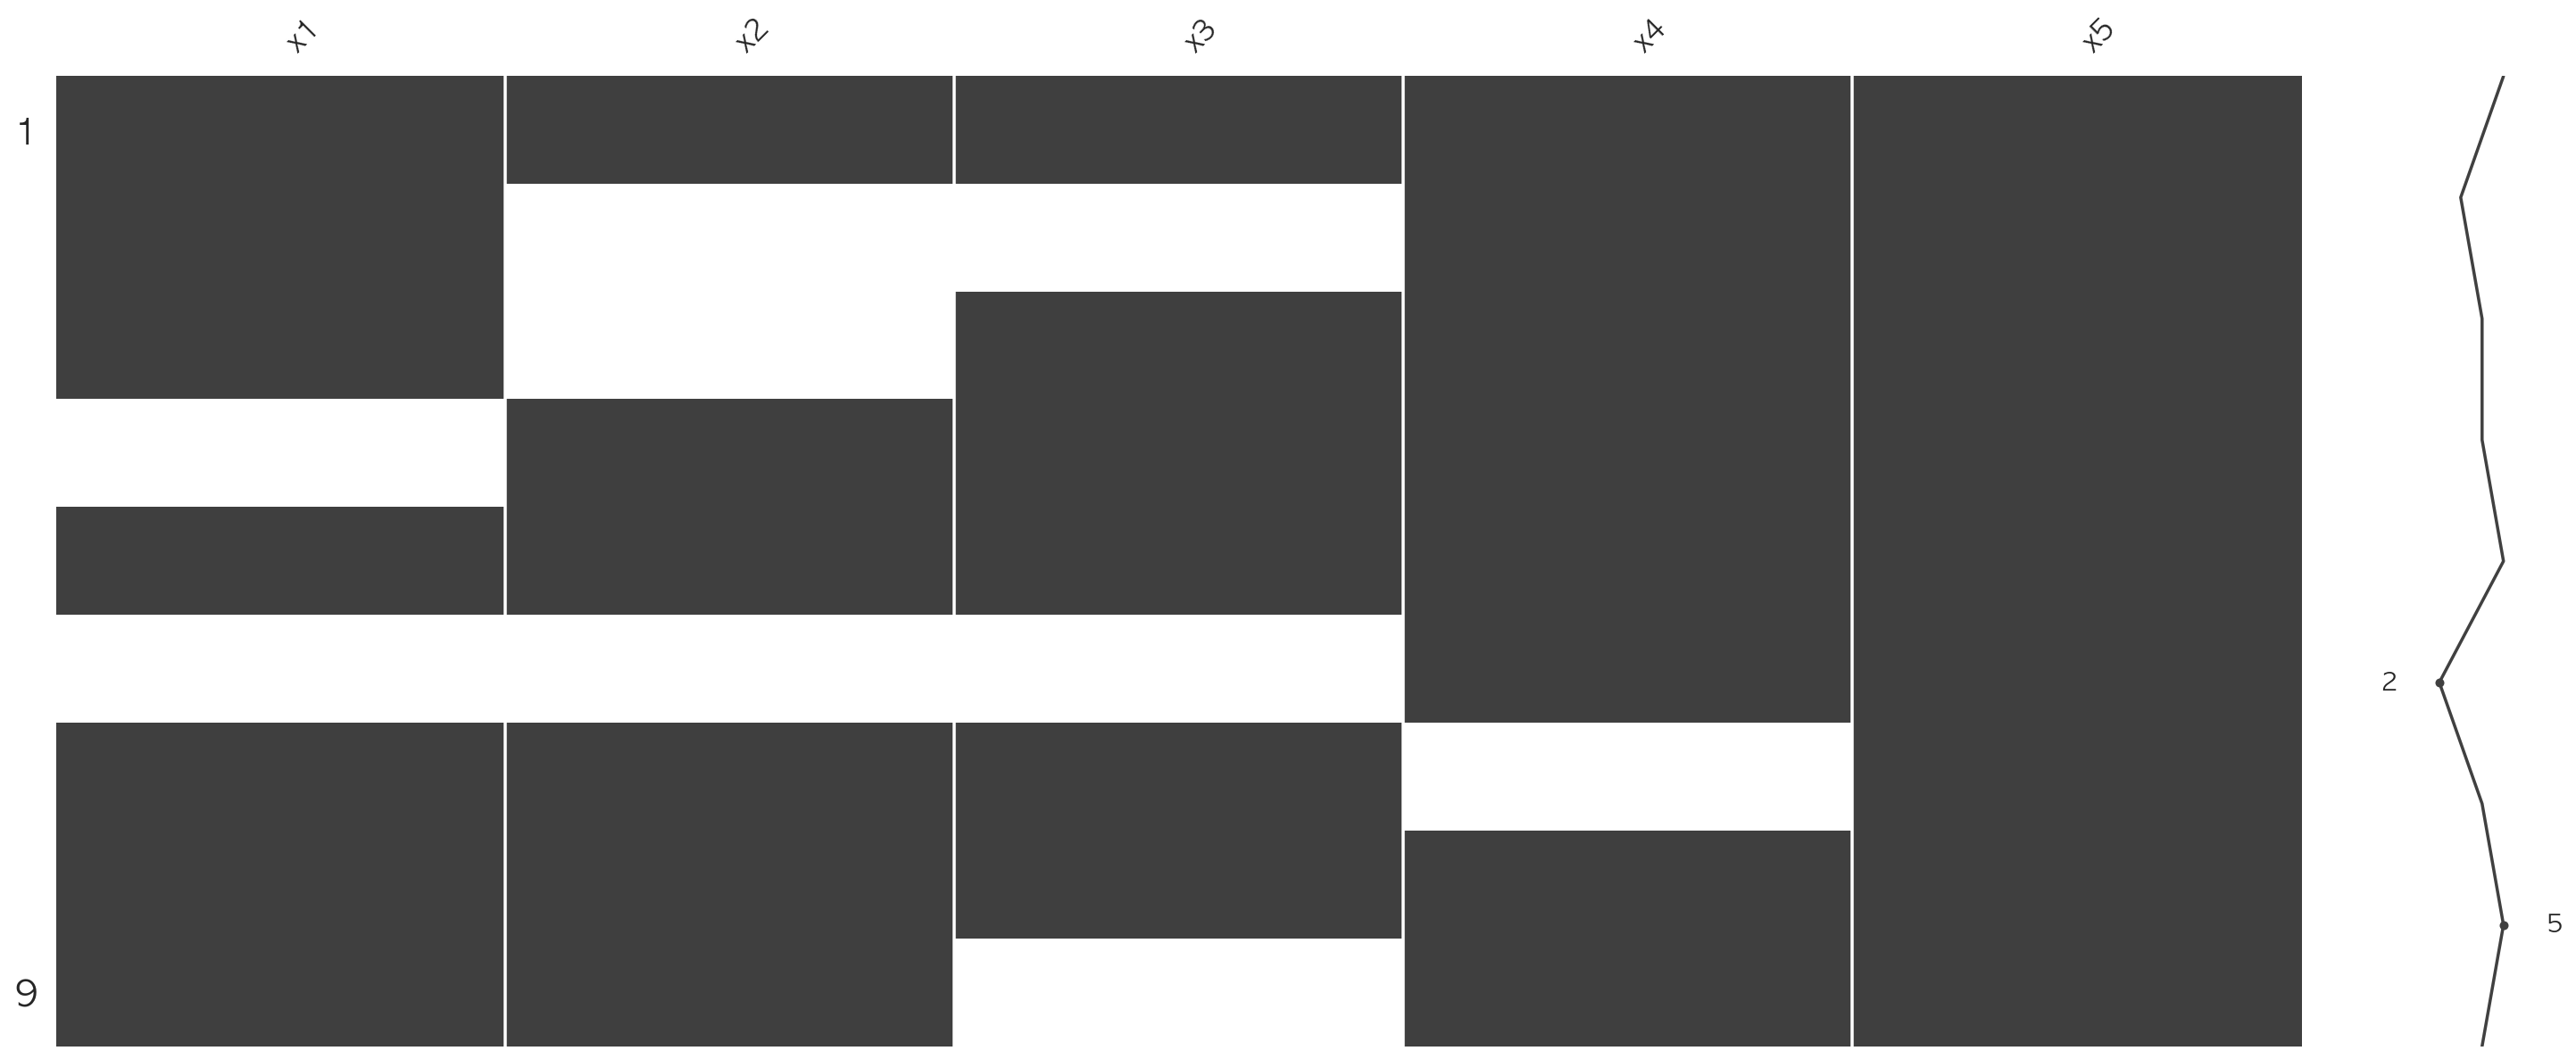

In [17]:
import missingno as msno

msno.matrix(df)
plt.show()

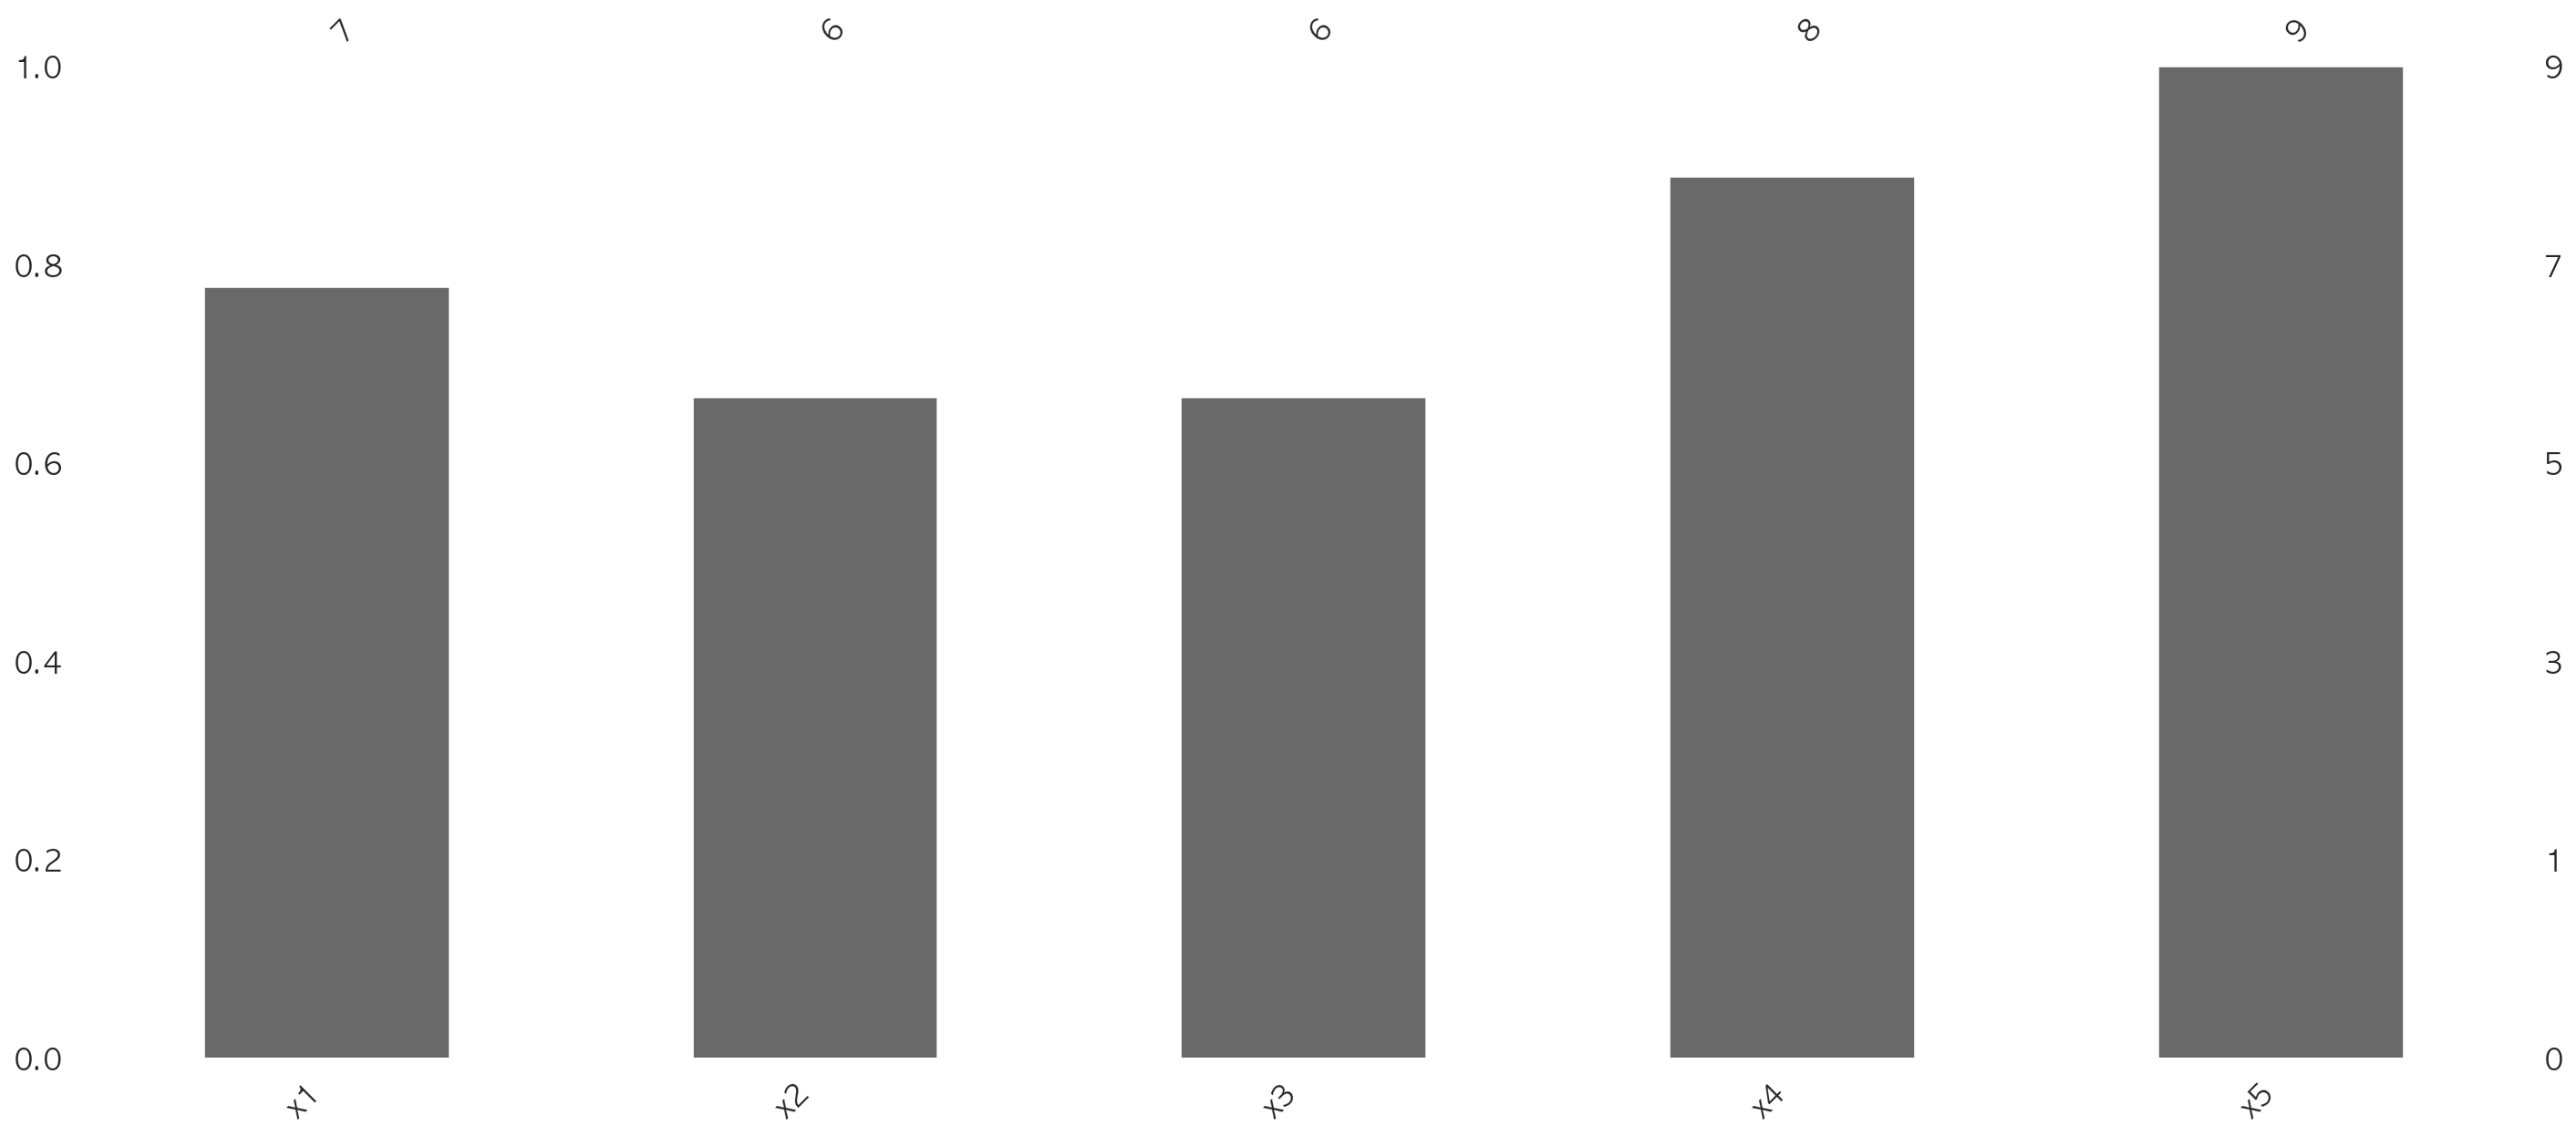

In [18]:
msno.bar(df)
plt.show()

In [19]:
titanic = sns.load_dataset('titanic')
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


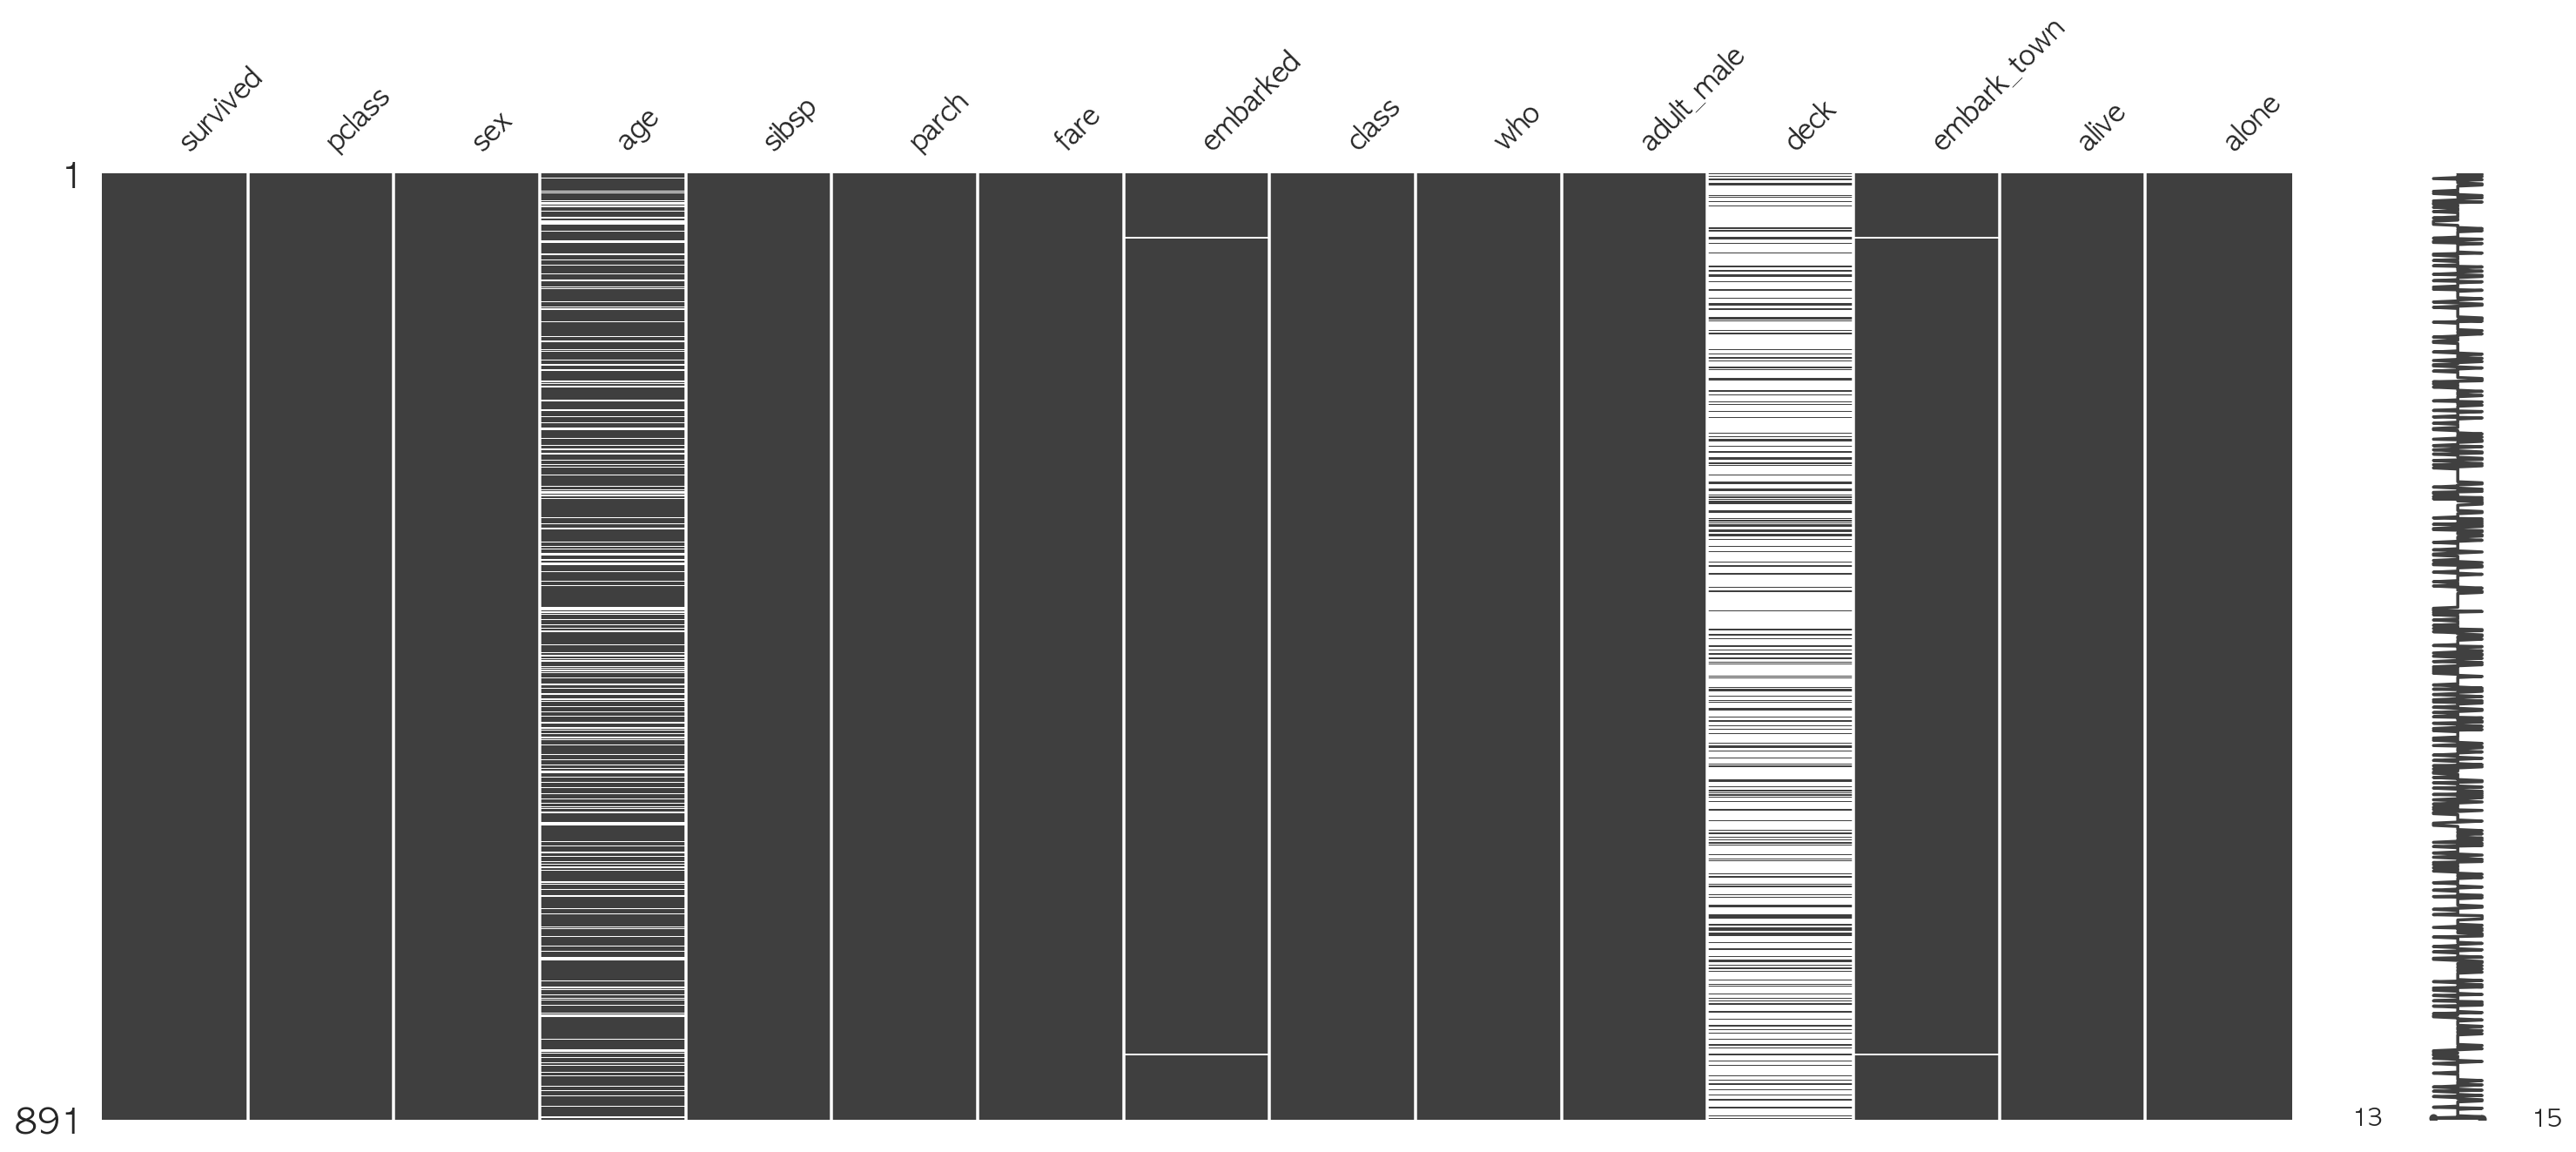

In [21]:
msno.matrix(titanic)
plt.show()

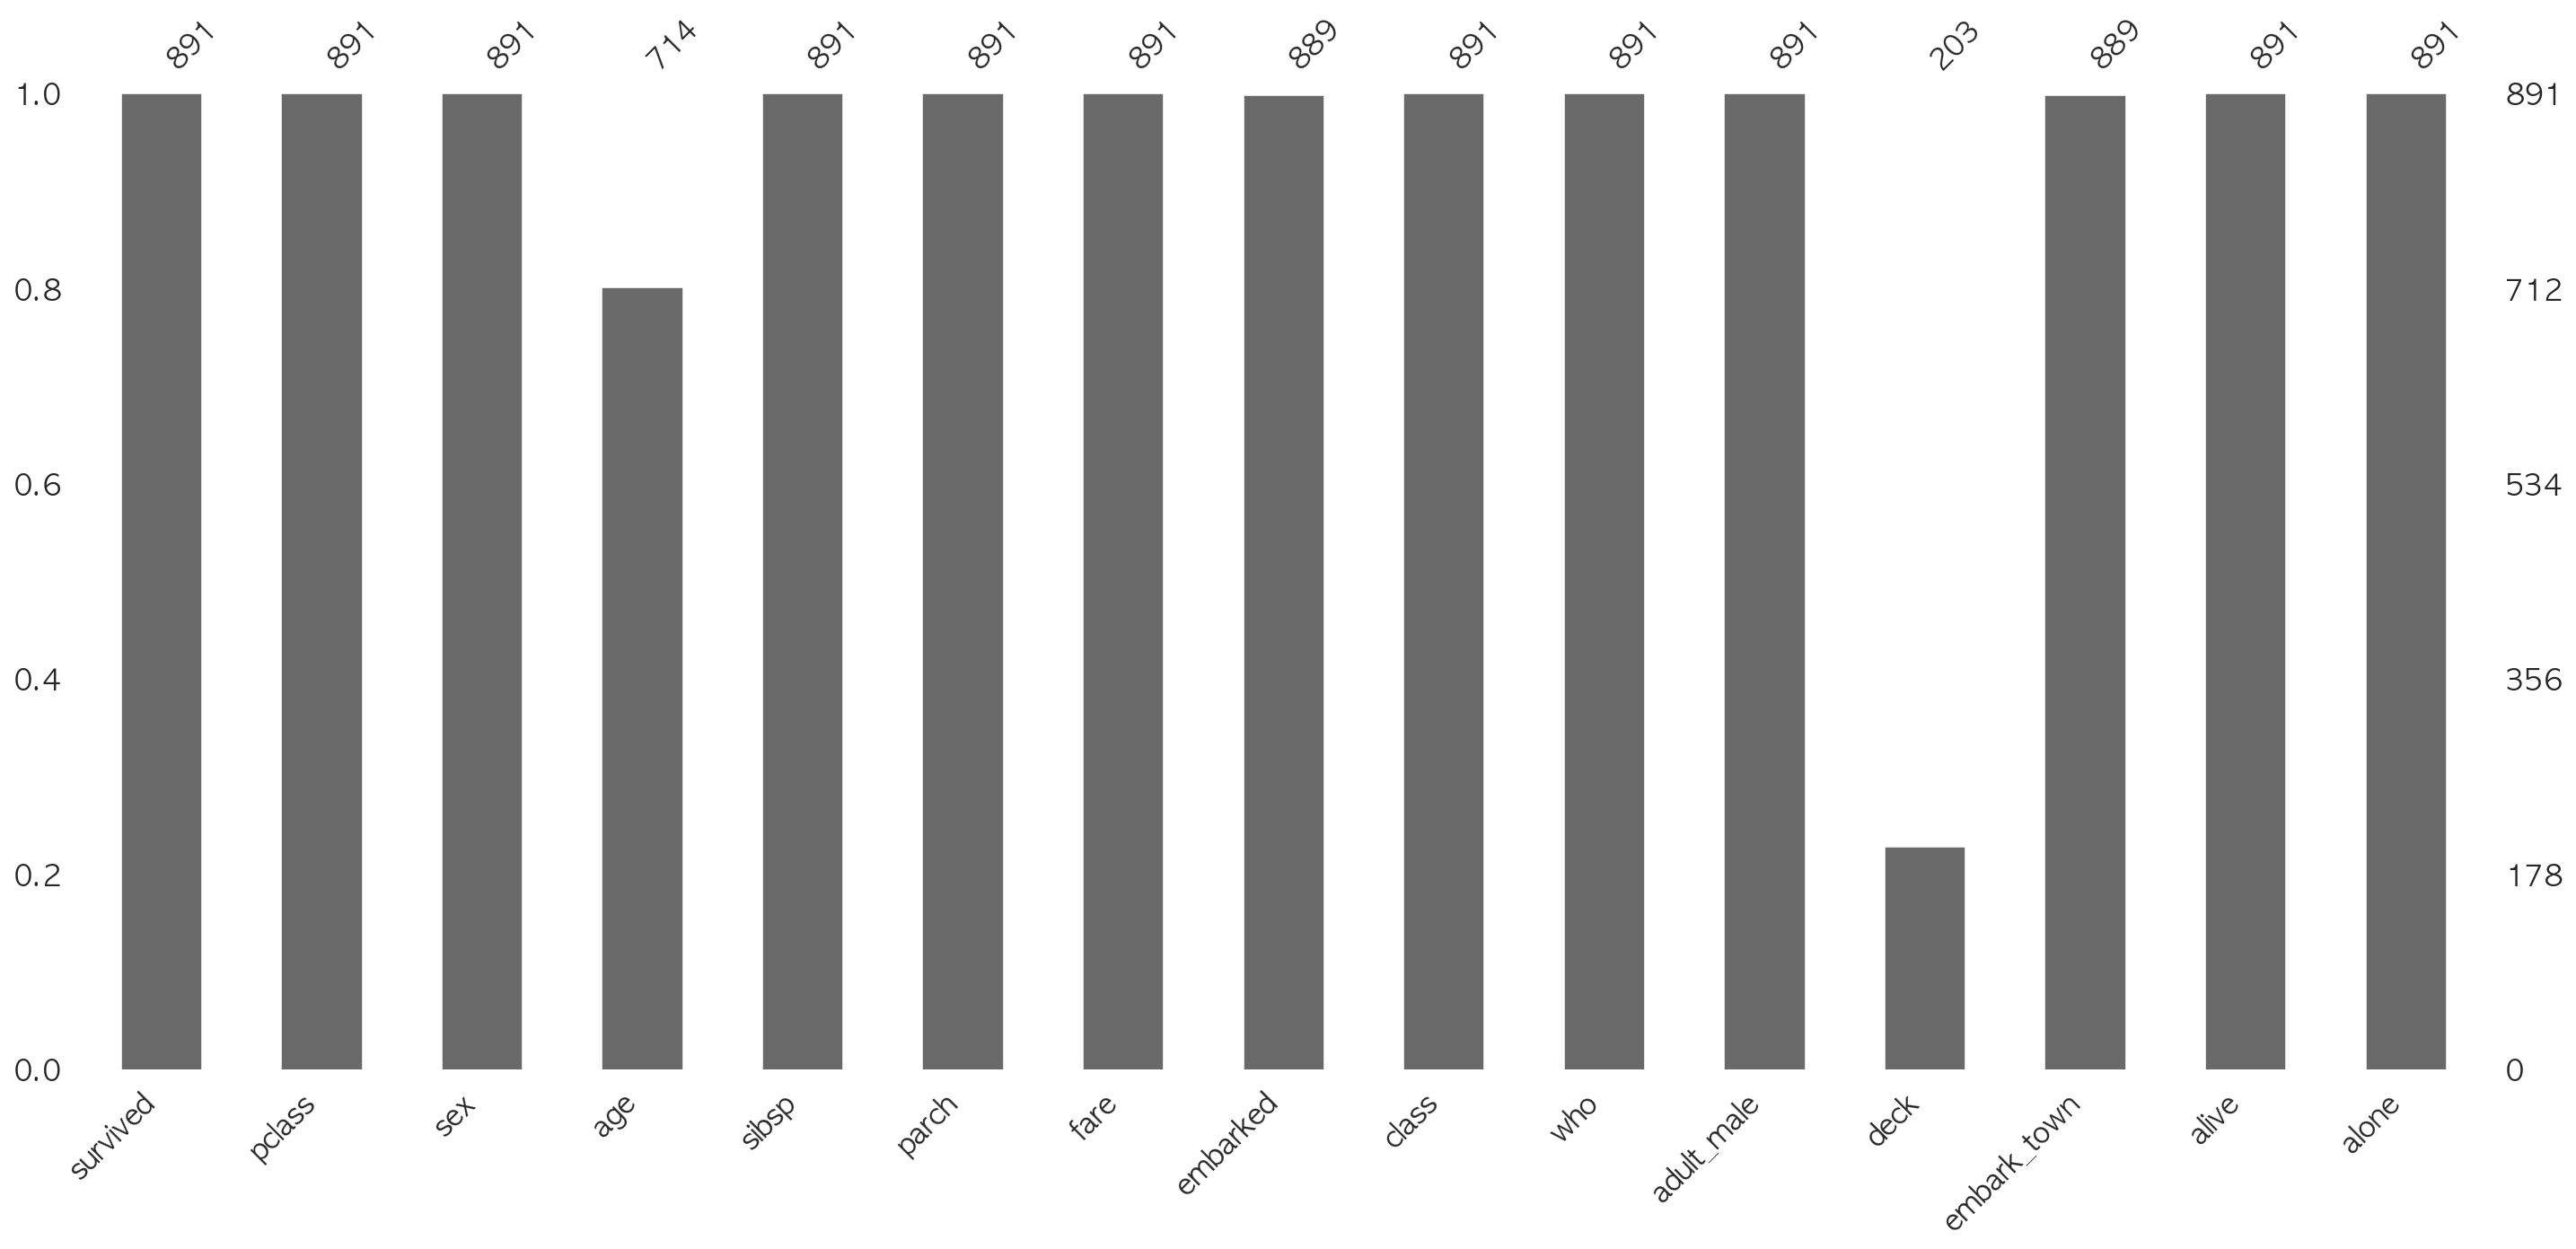

In [23]:
msno.bar(titanic)
plt.show()

#### 결측 데이터를 처리하는 방법 2가지 

 - 결측데이터가 너무 많은 경우, 해당 데이터의 열 전체 삭제
 - 결측데이터가 일부인 경우 그럴 듯한 값으로 대체 가능 
     - 결측 데이터 대체 ( imputation )

In [24]:
df

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
1,2,NaN,NaN,2019-01-02,B
2,3,NaN,3.0,2019-01-03,C
3,NaN,0.4,4.0,2019-01-04,A
4,5,0.5,5.0,2019-01-05,B
5,NaN,NaN,NaN,2019-01-06,C
6,7,0.7,7.0,NaT,A
7,8,0.8,8.0,2019-01-08,B
8,9,0.9,NaN,2019-01-09,C


In [25]:
df.dropna()

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
4,5,0.5,5.0,2019-01-05,B
7,8,0.8,8.0,2019-01-08,B


In [26]:
df.dropna(thresh = 7, axis=1)

,x1,x4,x5
0,1,2019-01-01,A
1,2,2019-01-02,B
2,3,2019-01-03,C
3,NaN,2019-01-04,A
4,5,2019-01-05,B
5,NaN,2019-01-06,C
6,7,NaT,A
7,8,2019-01-08,B
8,9,2019-01-09,C


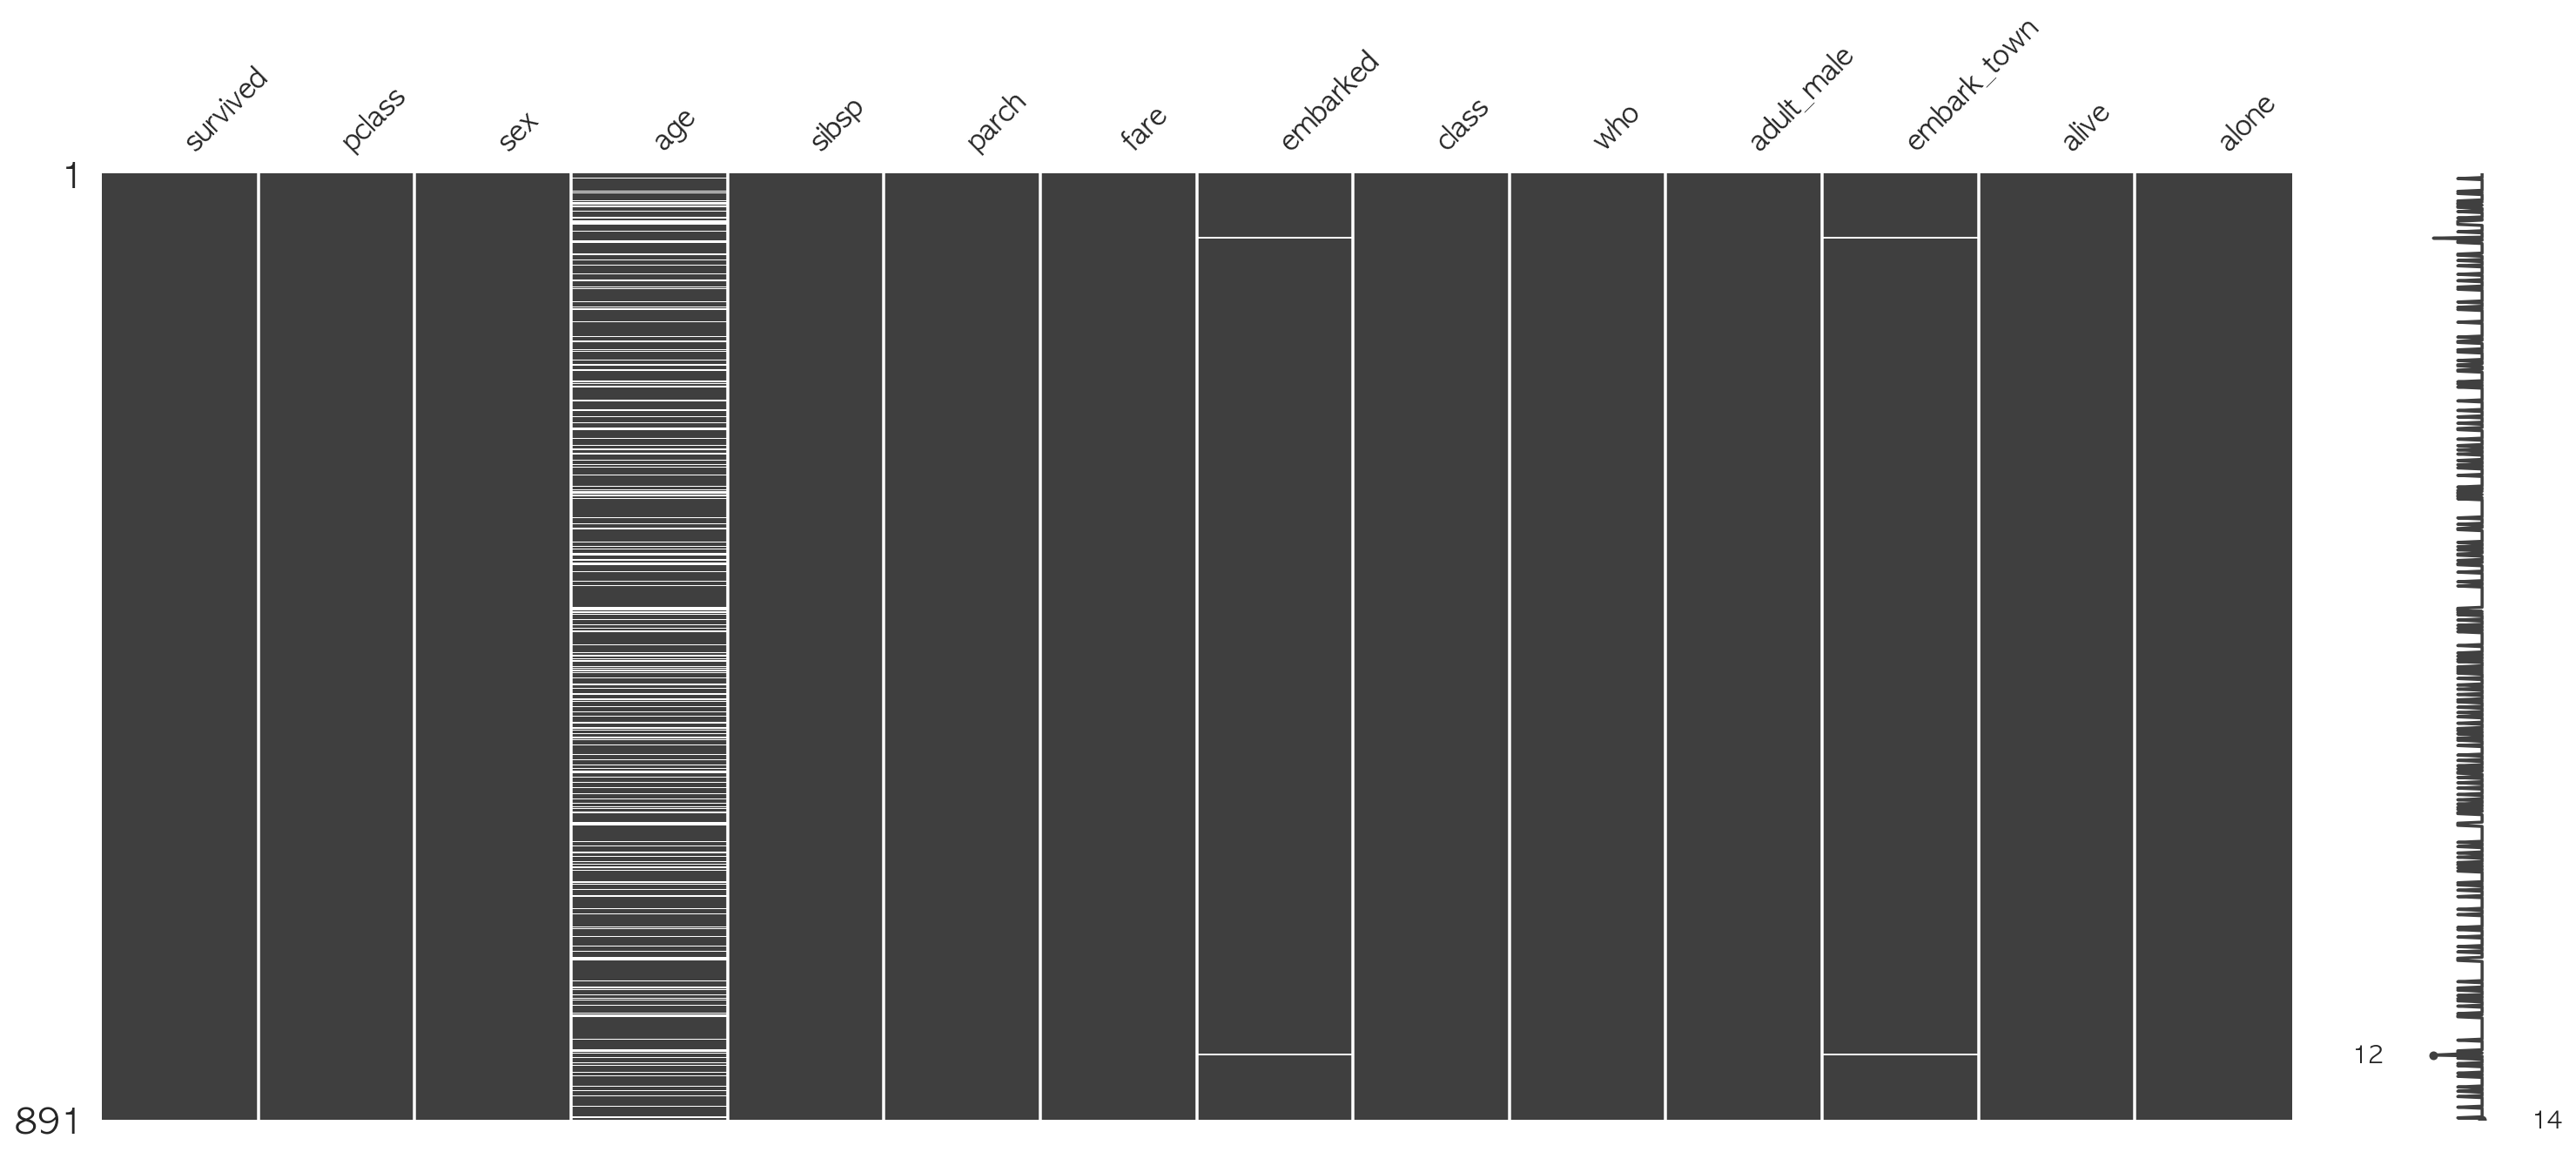

In [28]:
titanic = titanic.dropna(thresh=int(len(titanic)*0.5),axis=1)
msno.matrix(titanic)
plt.show()

#### 결측 데이터 대체

 - SimpleImputer
     - mean : 데이터가 실수 연속값인 경우, 값의 분포 대칭
     - median : 데이터가 실수 연속값인 경우, 값의 분포 비대칭
     - most_frequent : 데이터가 범주값이거나 정수값인 경우

In [31]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'most_frequent') # 최빈값
df = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)
df

,x1,x2,x3,x4,x5
0,1,0.1,1,2019-01-01,A
1,2,0.1,1,2019-01-02,B
2,3,0.1,3,2019-01-03,C
3,1,0.4,4,2019-01-04,A
4,5,0.5,5,2019-01-05,B
5,1,0.1,1,2019-01-06,C
6,7,0.7,7,2019-01-01,A
7,8,0.8,8,2019-01-08,B
8,9,0.9,1,2019-01-09,C


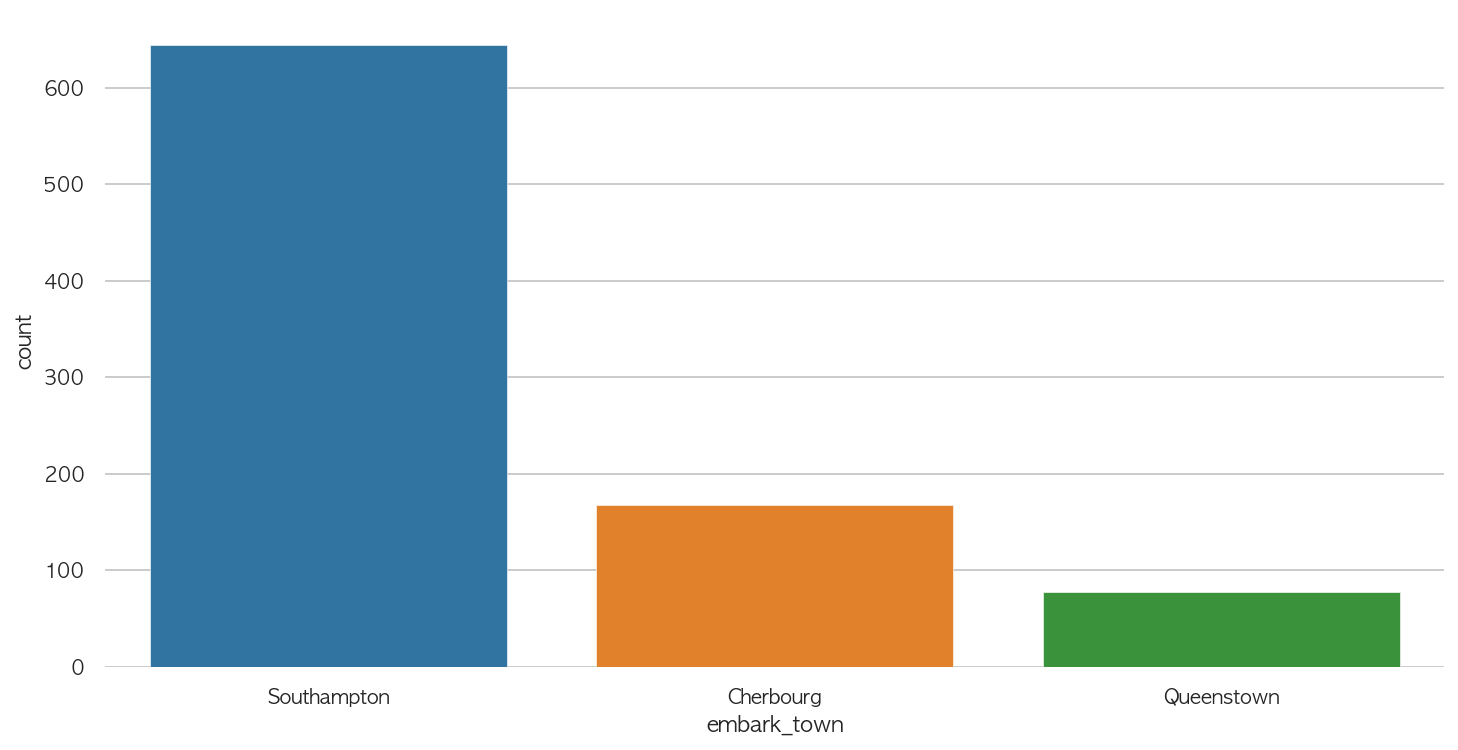

In [36]:
sns.countplot(titanic.embark_town)
plt.show()

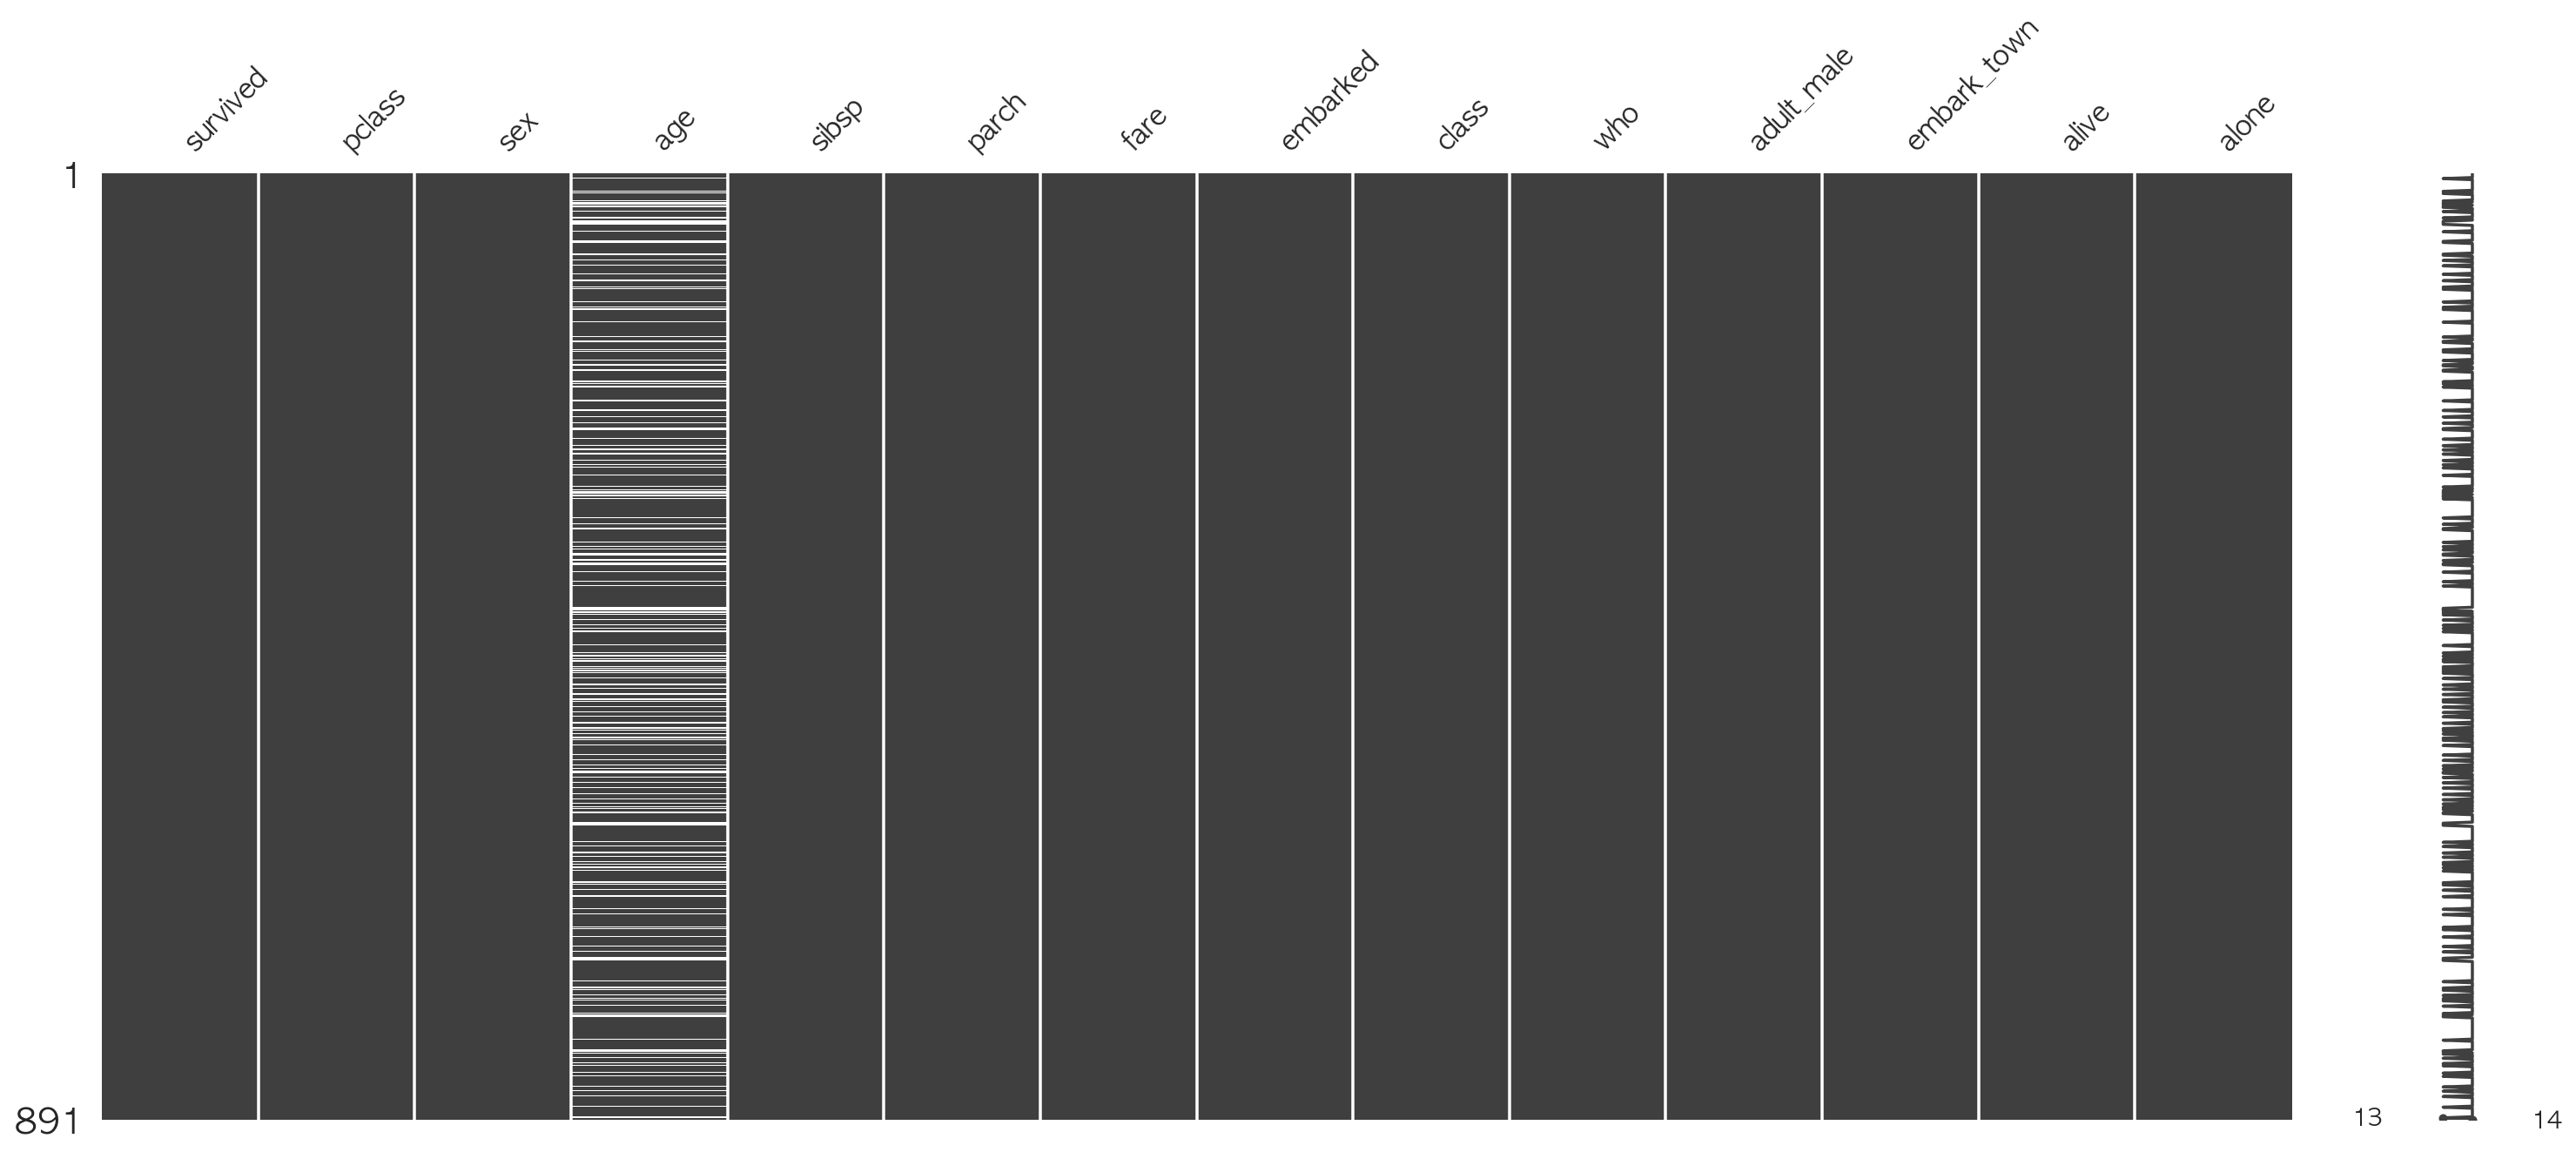

In [37]:
imputer_embark_town = SimpleImputer(strategy='most_frequent')
titanic['embark_town'] = imputer_embark_town.fit_transform(titanic[['embark_town']])
titanic['embarked'] = imputer_embark_town.fit_transform(titanic[['embarked']])

msno.matrix(titanic)
plt.show()

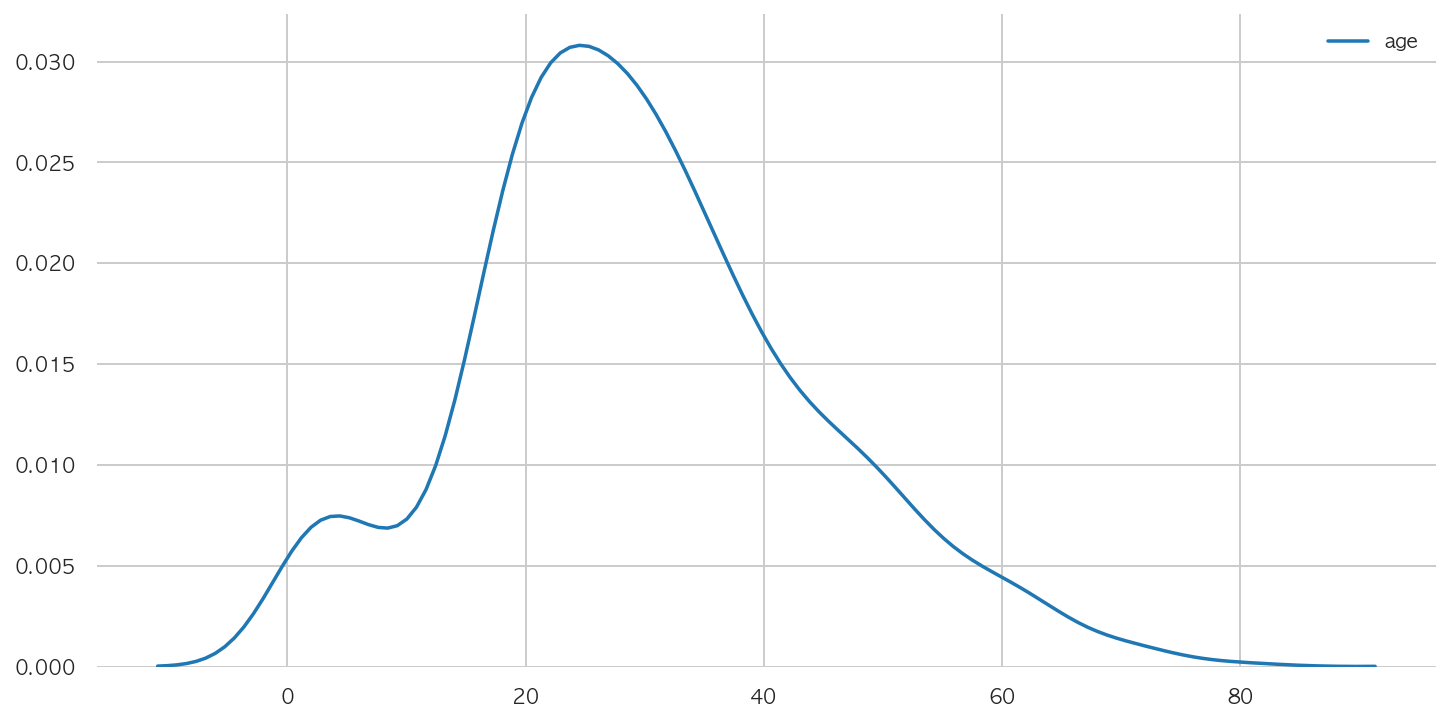

In [38]:
sns.kdeplot(titanic.age)
plt.show()

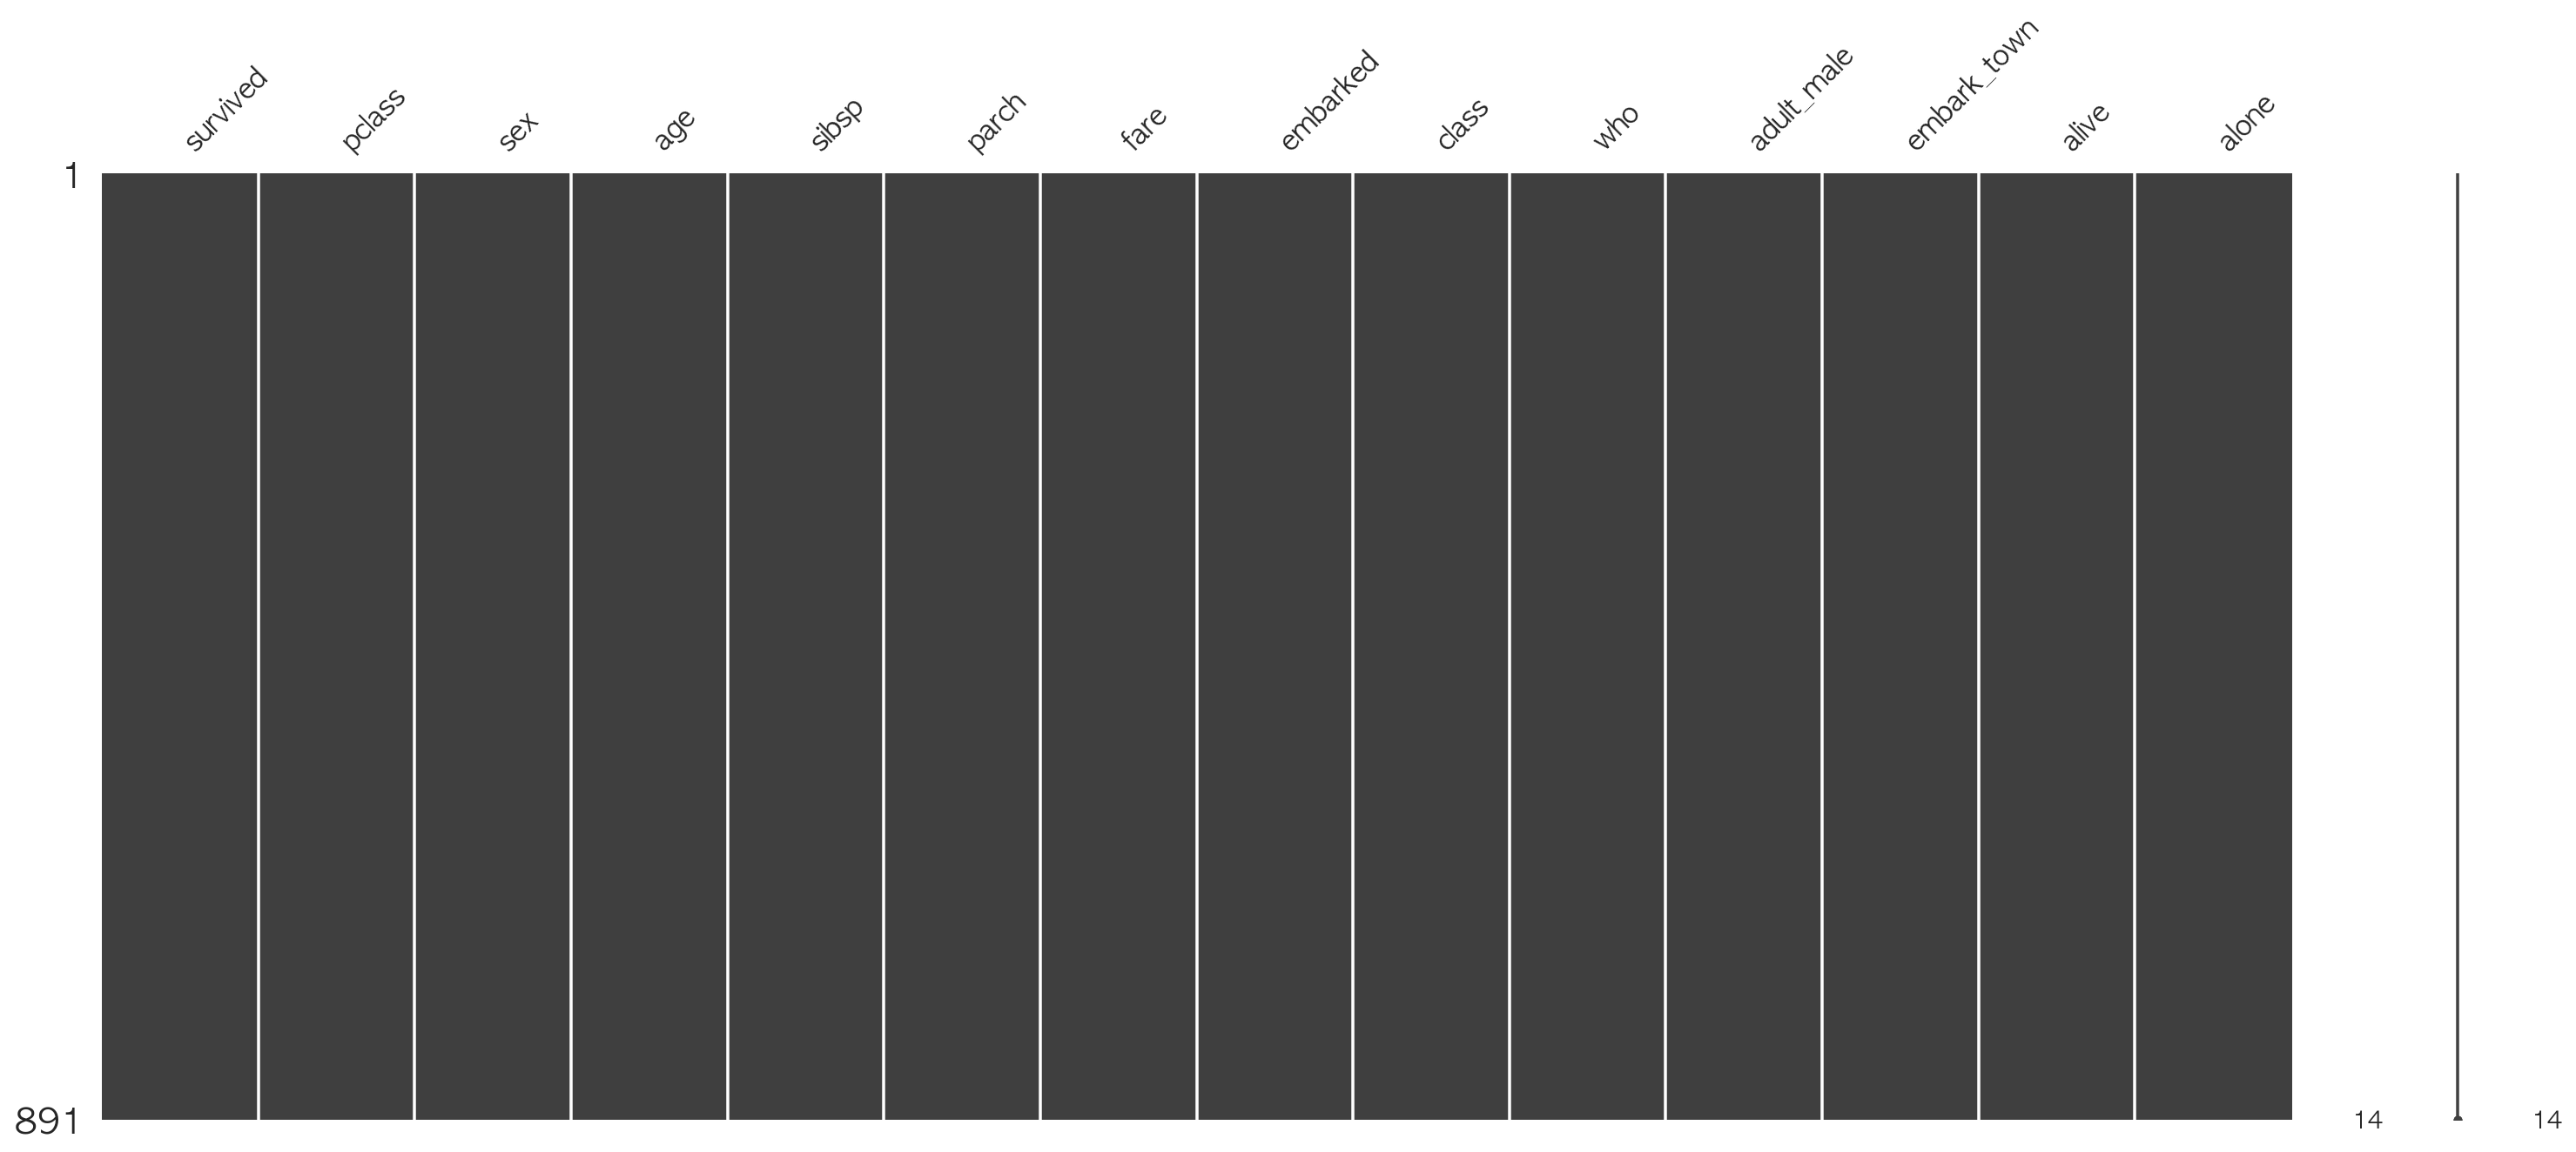

In [39]:
imputer_age = SimpleImputer(strategy='median')
titanic['age'] = imputer_embark_town.fit_transform(titanic[['age']])

msno.matrix(titanic)
plt.show()


---
### patsy package

 - formula 문자열 : dmatrix()
 

In [40]:
from patsy import demo_data

df = pd.DataFrame(demo_data('x1','x2','x3','x4','x5'))
df

,x1,x2,x3,x4,x5
0,1.76,-0.98,0.14,0.33,-2.55
1,0.40,0.95,1.45,1.49,0.65
2,0.98,-0.15,0.76,-0.21,0.86
3,2.24,-0.10,0.12,0.31,-0.74
4,1.87,0.41,0.44,-0.85,2.27


In [47]:
from patsy import dmatrix

dmatrix('x1+0',data=df) #'0' == 상수항을 넣지 마라

DesignMatrix with shape (5, 1)
       x1
  1.76405
  0.40016
  0.97874
  2.24089
  1.86756
  Terms:
    'x1' (column 0)

In [46]:
dmatrix('x1+x2+x3+0',data=df)

DesignMatrix with shape (5, 3)
       x1        x2       x3
  1.76405  -0.97728  0.14404
  0.40016   0.95009  1.45427
  0.97874  -0.15136  0.76104
  2.24089  -0.10322  0.12168
  1.86756   0.41060  0.44386
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x3' (column 2)

In [48]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
886,0,2,male,27.00,0,0,13.00,S,Second,man,True,Southampton,no,True
887,1,1,female,19.00,0,0,30.00,S,First,woman,False,Southampton,yes,True
888,0,3,female,24.00,1,2,23.45,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.00,0,0,30.00,C,First,man,True,Cherbourg,yes,True
890,0,3,male,32.00,0,0,7.75,Q,Third,man,True,Queenstown,no,True


In [52]:
dmatrix('survived + pclass + age + 0',data=titanic)

DesignMatrix with shape (891, 3)
  survived  pclass  age
         0       3   22
         1       1   38
         1       3   26
         1       1   35
         0       3   35
         0       3   24
         0       1   54
         0       3    2
         1       3   27
         1       2   14
         1       3    4
         1       1   58
         0       3   20
         0       3   39
         0       3   14
         1       2   55
         0       3    2
         1       2   24
         0       3   31
         1       3   24
         0       2   35
         1       2   34
         1       3   15
         1       1   28
         0       3    8
         1       3   38
         0       3   24
         0       1   19
         1       3   24
         0       3   24
  [861 rows omitted]
  Terms:
    'survived' (column 0)
    'pclass' (column 1)
    'age' (column 2)
  (to view full data, use np.asarray(this_obj))

In [55]:
dmatrix('x1 + np.log(np.abs(x2))+0',df)

DesignMatrix with shape (5, 2)
       x1  np.log(np.abs(x2))
  1.76405            -0.02298
  0.40016            -0.05120
  0.97874            -1.88811
  2.24089            -2.27090
  1.86756            -0.89014
  Terms:
    'x1' (column 0)
    'np.log(np.abs(x2))' (column 1)

In [56]:
# 상호작용

dmatrix('x1+x2+x1:x2+0',df)

DesignMatrix with shape (5, 3)
       x1        x2     x1:x2
  1.76405  -0.97728  -1.72397
  0.40016   0.95009   0.38018
  0.97874  -0.15136  -0.14814
  2.24089  -0.10322  -0.23130
  1.86756   0.41060   0.76682
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x1:x2' (column 2)

In [57]:
dmatrix('x1*x2+0',df)

DesignMatrix with shape (5, 3)
       x1        x2     x1:x2
  1.76405  -0.97728  -1.72397
  0.40016   0.95009   0.38018
  0.97874  -0.15136  -0.14814
  2.24089  -0.10322  -0.23130
  1.86756   0.41060   0.76682
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x1:x2' (column 2)

In [59]:
# I안에 있는 건 상호작용이 아닌 연산자

dmatrix('x1+x2+I(x1+x2)+0',df)

DesignMatrix with shape (5, 3)
       x1        x2  I(x1 + x2)
  1.76405  -0.97728     0.78677
  0.40016   0.95009     1.35025
  0.97874  -0.15136     0.82738
  2.24089  -0.10322     2.13767
  1.86756   0.41060     2.27816
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'I(x1 + x2)' (column 2)

### 스케일링

- center() : 평균을 0으로 스케일링
- standardize() : 평균을 9으로 하고 표준편차를 1로 스케일링
- scale() : standardize() 와 같음

In [63]:
# x1 데이터에서  x1의 평균을 빼는 것과 같다.

dm = dmatrix('center(x1) + 0 ',df)
dm

DesignMatrix with shape (5, 1)
  center(x1)
     0.31377
    -1.05012
    -0.47154
     0.79061
     0.41728
  Terms:
    'center(x1)' (column 0)

In [65]:
df.x1 - df['x1'].mean()

0    0.31
1   -1.05
2   -0.47
3    0.79
4    0.42
Name: x1, dtype: float64

In [66]:
# 저장 : design_info

dm.design_info.factor_infos

{EvalFactor('center(x1)'): FactorInfo(factor=EvalFactor('center(x1)'),
            type='numerical',
            state=<factor state>,
            num_columns=1)}

---
### sklearn.preprocessing package

 - StandardScaler
     - fit() : mean(), std() 계산해서 저장
     - fit_transform() : 평균 0 ,  표준편차 1
     - 검증용 데이터로 단위를 다시 바꾸면 안됨 !
         - 바뀐 데이터를 불러와서 사용해야 한다.

In [79]:
X = np.arange(7).reshape(-1,1)
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [80]:
from sklearn.preprocessing import  StandardScaler

scaler = StandardScaler()
scaler.fit_transform(X)

array([[-1.5],
       [-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 1. ],
       [ 1.5]])

In [81]:
X2 = np.vstack([X,[[1000]]])
X2

array([[   0],
       [   1],
       [   2],
       [   3],
       [   4],
       [   5],
       [   6],
       [1000]])

In [82]:
scaler.fit_transform(X2)

array([[-0.38705669],
       [-0.38402392],
       [-0.38099115],
       [-0.37795839],
       [-0.37492562],
       [-0.37189286],
       [-0.36886009],
       [ 2.64570872]])

#### outlier 가 존재하는 경우 RobustScaler 를 사용 
    - median = 0, IQR = 1

In [85]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit_transform(X2)

array([[-1.00000000e+00],
       [-7.14285714e-01],
       [-4.28571429e-01],
       [-1.42857143e-01],
       [ 1.42857143e-01],
       [ 4.28571429e-01],
       [ 7.14285714e-01],
       [ 2.84714286e+02]])

#### preprocessing 
    - FunctionTransformer
    - PolynomialFeatures
    
    - degree : 차수
    - include_bais : 상수항 생성여부 

In [86]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
poly.fit_transform(X)

array([[ 1.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  5., 25.],
       [ 1.,  6., 36.]])

--- 
### 범주형 데이터 처리

 1. 범주형 데이터의 정의
     - 종류를 표시하는 데이터
     - category data
     
     
 2. 범주형 데이터의 변형
     - 숫자로 변환
         
         1) 더미변수화
         
         2) 카테고리 임베딩
         
 -----
 
 #### 더미변수화 
 
  - 더미변수 (dummy variable) : 1과 0만 가지는 값 
  
       - 이진지시자
       - 이진변수
       - 지시변수
       - 설계변수
       - 처치

In [88]:
# 더미변수 생성

df1 = pd.DataFrame(['Male','Female'],columns=['x'])
df1

,x
0,Male
1,Female


In [89]:
from patsy import dmatrix

dmatrix('x+0',df1)

DesignMatrix with shape (2, 2)
  x[Female]  x[Male]
          0        1
          1        0
  Terms:
    'x' (columns 0:2)

In [91]:
df2 = pd.DataFrame(['A','B','O','AB'],columns=['x'])
df2

,x
0,A
1,B
2,O
3,AB


In [92]:
dmatrix('x+0',df2)

DesignMatrix with shape (4, 4)
  x[A]  x[AB]  x[B]  x[O]
     1      0     0     0
     0      0     1     0
     0      0     0     1
     0      1     0     0
  Terms:
    'x' (columns 0:4)

In [93]:
df3 = pd.DataFrame([1,2,3,4],columns=['x'])
df3

,x
0,1
1,2
2,3
3,4


In [94]:
dmatrix('C(x)+0',df3)

DesignMatrix with shape (4, 4)
  C(x)[1]  C(x)[2]  C(x)[3]  C(x)[4]
        1        0        0        0
        0        1        0        0
        0        0        1        0
        0        0        0        1
  Terms:
    'C(x)' (columns 0:4)

In [100]:
dm = dmatrix("C(x,levels = ['A','B','AB','O'])+0", df2) #카테고리
dm

DesignMatrix with shape (4, 4)
  Columns:
    ["C(x, levels=['A', 'B', 'AB', 'O'])[A]",
     "C(x, levels=['A', 'B', 'AB', 'O'])[B]",
     "C(x, levels=['A', 'B', 'AB', 'O'])[AB]",
     "C(x, levels=['A', 'B', 'AB', 'O'])[O]"]
  Terms:
    "C(x, levels=['A', 'B', 'AB', 'O'])" (columns 0:4)
  (to view full data, use np.asarray(this_obj))

In [99]:
np.array(dm)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

--- 
### 축소랭크방식

 - Full Rack == 더미변수 방식
 - reduced-rank 
   - 특정한 하나의 범주값을 기준값, 그 값에 대응하는 더미변수의 가중치는 항상 1

---- 

 - dmatrix()에서 formula 문자열에 '+0'을 생략하면 축소랭크방식으로 더미변수 생성
      - intercept

In [101]:
dmatrix('x',df1)

DesignMatrix with shape (2, 2)
  Intercept  x[T.Male]
          1          1
          1          0
  Terms:
    'Intercept' (column 0)
    'x' (column 1)

In [104]:
dmatrix("C(x,Treatment('Male'))",df1) # 기준 범주값 변경

DesignMatrix with shape (2, 2)
  Intercept  C(x, Treatment('Male'))[T.Female]
          1                                  0
          1                                  1
  Terms:
    'Intercept' (column 0)
    "C(x, Treatment('Male'))" (column 1)

In [106]:
dmatrix('x',df2)

DesignMatrix with shape (4, 4)
  Intercept  x[T.AB]  x[T.B]  x[T.O]
          1        0       0       0
          1        0       1       0
          1        0       0       1
          1        1       0       0
  Terms:
    'Intercept' (column 0)
    'x' (columns 1:4)

---
### 범주형 데이터가 2개인 경우

 1. 통합 축소형 방식
 2. 상호작용 방식

In [107]:
df4 = pd.DataFrame([["A", "X"], ["B", "X"], ["A", "Y"], ["B", "Y"]], columns=["x1", "x2"])
df4

,x1,x2
0,A,X
1,B,X
2,A,Y
3,B,Y


In [108]:
dmatrix('x1+x2',df4)

DesignMatrix with shape (4, 3)
  Intercept  x1[T.B]  x2[T.Y]
          1        0        0
          1        1        0
          1        0        1
          1        1        1
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'x2' (column 2)

In [109]:
dmatrix('x1:x2+0',df4)

DesignMatrix with shape (4, 4)
  x1[A]:x2[X]  x1[B]:x2[X]  x1[A]:x2[Y]  x1[B]:x2[Y]
            1            0            0            0
            0            1            0            0
            0            0            1            0
            0            0            0            1
  Terms:
    'x1:x2' (columns 0:4)

---
#### 카테고리 임베딩

 - 카테고리 값 대신에 실수값을 쓰는 것 
    - 내부적인 특성을 대신 활용
    - 분석에 필요한 범주값을 모두 활용할 수 있다. 
    - 외부의 추가적인 데이터를 조사해야한다는 부담이 있음. 